In [1]:
import cv2 as cv
import numpy as np
import os
import torch

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from torchvision import datasets, models, transforms

from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from skimage.io import imread
import pandas as pd
from tqdm import tqdm


In [2]:
from extract_features import ExtractFeaturesBagOfVisualWords
from estimate_metrics import MetricsAnaliser

In [9]:
k = 2
train_path = './dataset/raw-img/'

extract_feature = ExtractFeaturesBagOfVisualWords(num_images=500)
metrics = MetricsAnaliser()

In [4]:
sift = cv.xfeatures2d.SIFT_create()

[ WARN:0@1.576] global /io/opencv_contrib/modules/xfeatures2d/misc/python/shadow_sift.hpp (13) SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


In [5]:
images, labels = extract_feature.load_dataset(train_path)

100%|███████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  3.32it/s]


In [6]:
train_dataset_array = np.array(images)

In [7]:
all_descriptors_dict, descriptors_list = extract_feature.descriptor_of_images(images)

100%|███████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:58<00:00,  5.87s/it]


In [10]:
clusterized_descriptors = extract_feature.kmeans_num_visual_words(k, descriptors_list)

In [11]:
bovw_data = extract_feature.image_class(all_descriptors_dict, clusterized_descriptors)

In [12]:
df = extract_feature.create_dataframe_to_dataset(bovw_data)
x_train, y_train, x_test, y_test = extract_feature.train_test_data(df, 0.25)

In [13]:
SVM = SVC()
RF = RandomForestClassifier()
KNN = KNeighborsClassifier()

classifier_SVM  = SVM.fit(x_train, y_train)
classifier_RF =  RF.fit(x_train, y_train)
classifier_KNN = KNN.fit(x_train, y_train)

y_pred_svm = classifier_SVM.predict(x_test)
y_pred_rf = classifier_RF.predict(x_test)
y_pred_knn = classifier_KNN.predict(x_test)

results_pred = [y_pred_svm, y_pred_rf, y_pred_knn]
classifiers = ["SVM", "RF", "KNN"]


Results in SVM: 

Accuracy: 0.14924181963288108
F1-Score: 0.10152095620905388
Precision: 0.10039459304910581
Recall: 0.16026628451135835

Results in RF: 

Accuracy: 0.1300877893056664
F1-Score: 0.12926752777073547
Precision: 0.12969319260020348
Recall: 0.13232421494917862


/home/dev_machine/.cache/pypoetry/virtualenvs/pattern_recognition-q6SkOk2A-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Results in KNN: 

Accuracy: 0.12130885873902633
F1-Score: 0.11649271690622046
Precision: 0.11648988331806014
Recall: 0.1210388483564718


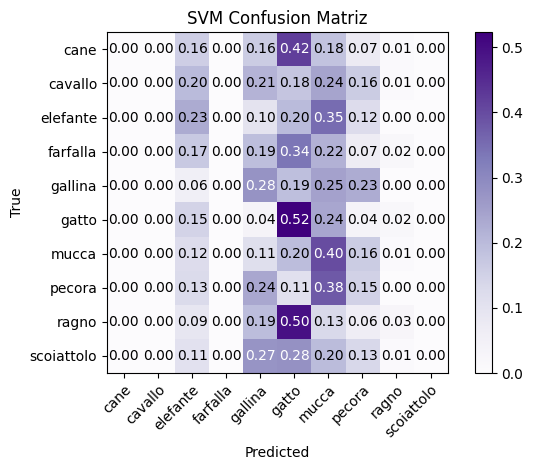

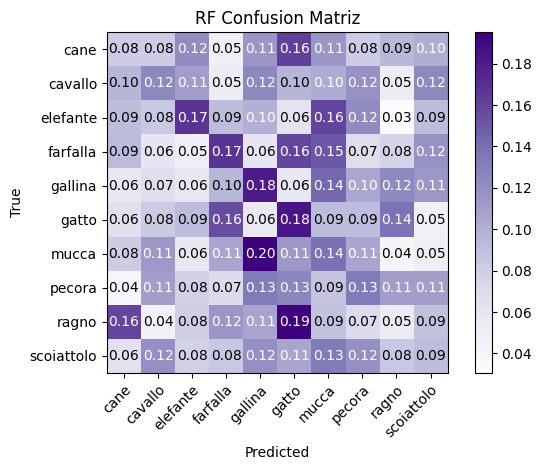

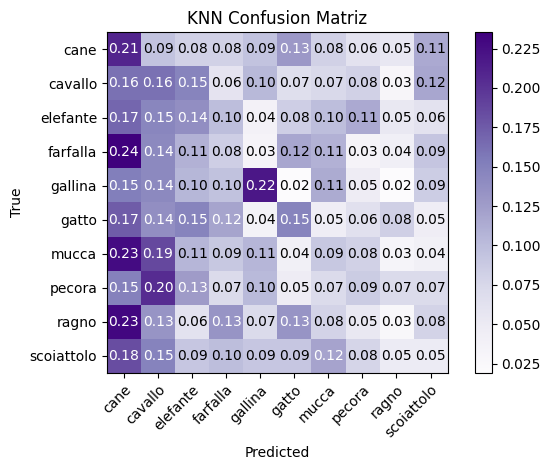

In [14]:
for pred_index in range(len(results_pred)):
    print(f"\nResults in {classifiers[pred_index]}: \n")
    metrics.plot_confusion_matrix(y_test,
                                  results_pred[pred_index],
                                  labels,
                                  title=f"{classifiers[pred_index]} Confusion Matriz",
                                  save_as=f"k{k}{classifiers[pred_index]}.png")


Results in SVM: 

Accuracy: 0.10135674381484437
F1-Score: 0.0635001489121233
Precision: 0.04757033987891991
Recall: 0.10202865335648026

Results in RF: 

Accuracy: 0.10454908220271349
F1-Score: 0.10286306829099649
Precision: 0.10262134538192624
Recall: 0.10438344872826053


/home/dev_machine/.cache/pypoetry/virtualenvs/pattern_recognition-q6SkOk2A-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Results in KNN: 

Accuracy: 0.09816440542697526
F1-Score: 0.09564774135168737
Precision: 0.0989837629311699
Recall: 0.09779642552083825

Results in SVM: 

Accuracy: 0.11252992817238627
F1-Score: 0.07388631197689519
Precision: 0.0575912705152992
Recall: 0.11126656405189014

Results in RF: 

Accuracy: 0.1005586592178771
F1-Score: 0.09935177356641517
Precision: 0.09941931455673146
Recall: 0.10048849887104408


/home/dev_machine/.cache/pypoetry/virtualenvs/pattern_recognition-q6SkOk2A-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Results in KNN: 

Accuracy: 0.10454908220271349
F1-Score: 0.10020561252851445
Precision: 0.1034027808377399
Recall: 0.10352078081632125

Results in SVM: 

Accuracy: 0.08778930566640064
F1-Score: 0.05881839203860384
Precision: 0.04593350750771416
Recall: 0.0907032152863473

Results in RF: 

Accuracy: 0.09337589784517158
F1-Score: 0.09311372250876213
Precision: 0.09379570830095314
Recall: 0.09451622553734094


/home/dev_machine/.cache/pypoetry/virtualenvs/pattern_recognition-q6SkOk2A-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Results in KNN: 

Accuracy: 0.09018355945730247
F1-Score: 0.08468037643152107
Precision: 0.08649264578804156
Recall: 0.0892217549483918


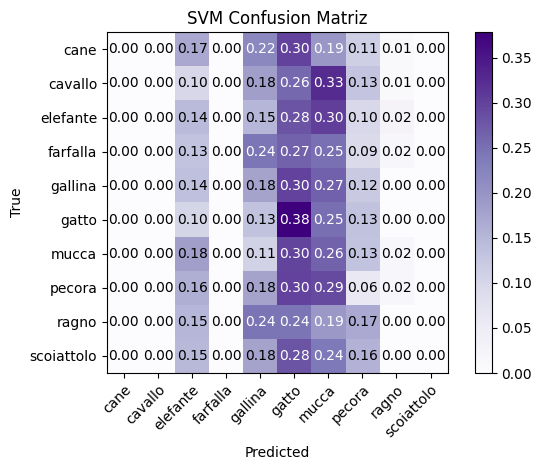

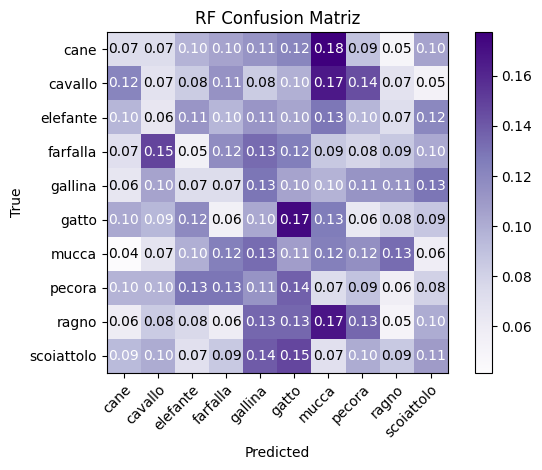

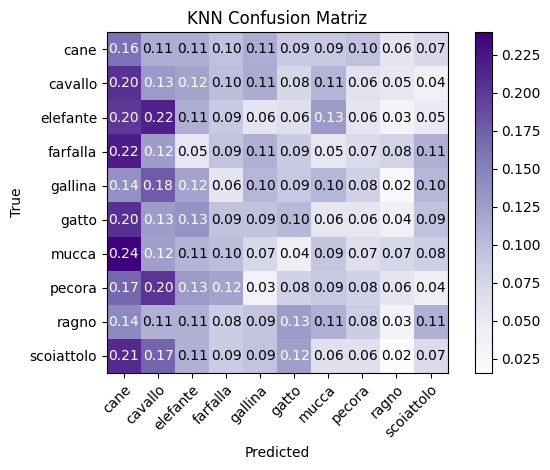

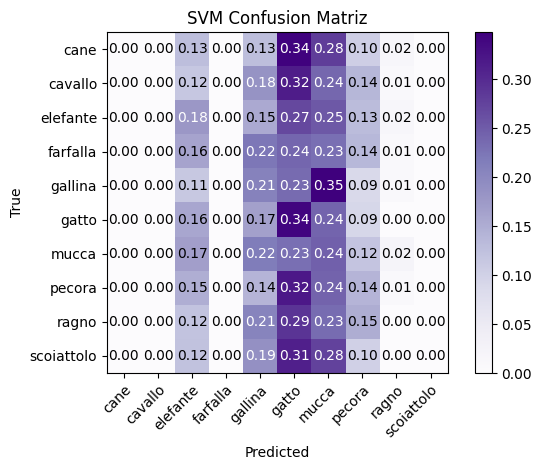

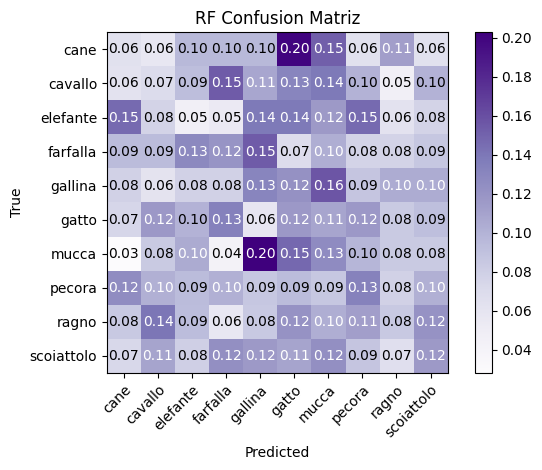

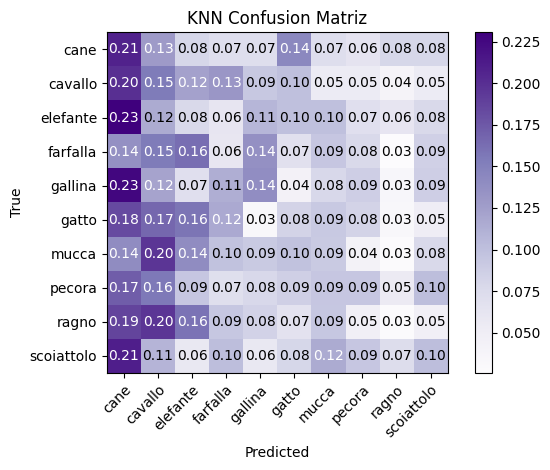

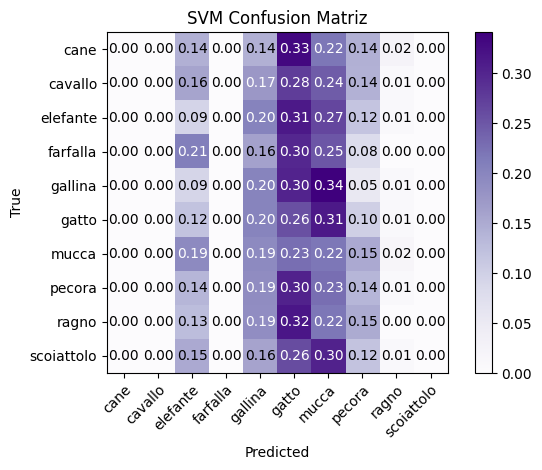

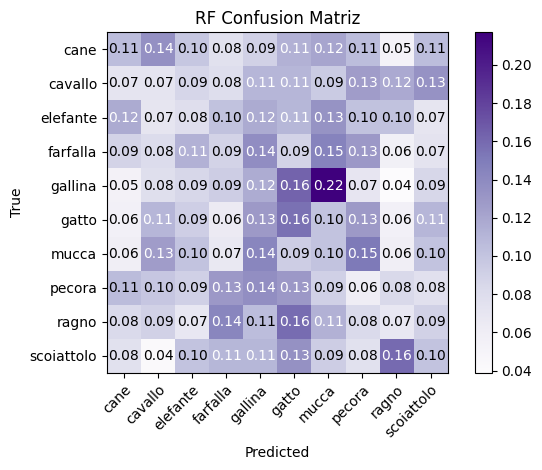

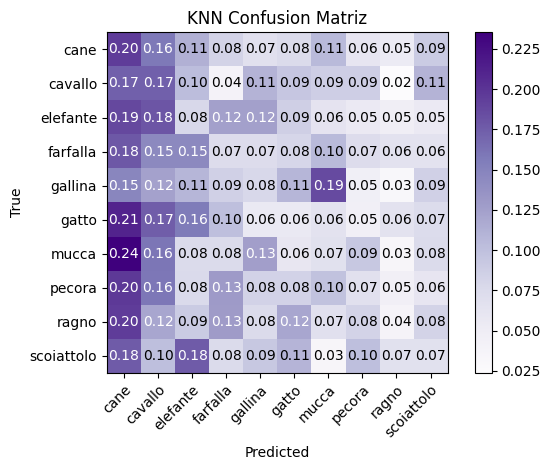

In [15]:
num_of_bag_words = [5, 25, 50] 
for current_num_of_bag_words in num_of_bag_words:    
    clusterized_descriptors = extract_feature.kmeans_num_visual_words(current_num_of_bag_words, descriptors_list)
    bovw_data = extract_feature.image_class(all_descriptors_dict, clusterized_descriptors)
    df = extract_feature.create_dataframe_to_dataset(bovw_data)
    x_train, y_train, x_test, y_test = extract_feature.train_test_data(df, 0.25)

    SVM = SVC()
    RF = RandomForestClassifier()
    KNN = KNeighborsClassifier()

    classifier_SVM  = SVM.fit(x_train, y_train)
    classifier_RF =  RF.fit(x_train, y_train)
    classifier_KNN = KNN.fit(x_train, y_train)

    y_pred_svm = classifier_SVM.predict(x_test)
    y_pred_rf = classifier_RF.predict(x_test)
    y_pred_knn = classifier_KNN.predict(x_test)

    for pred_index in range(len(results_pred)):
        print(f"\nResults in {classifiers[pred_index]} with num_of_bag_visual_words : {current_num_of_bag_words}\n")
        metrics.plot_confusion_matrix(y_test,
                                      results_pred[pred_index],
                                      labels,
                                      title=f"{classifiers[pred_index]} Confusion Matriz",
                                      save_as=f"k{current_num_of_bag_words}_{classifiers[pred_index]}.png")